In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# read the data
df = pd.read_csv('telecom_sample.csv')

In [5]:
df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Contract,Churn
0,1,Male,44,47,24.62,6491.62,One year,Yes
1,2,Male,27,30,54.59,4188.75,Month-to-month,No
2,3,Male,63,49,23.61,5571.60,Month-to-month,Yes
3,4,Male,28,53,26.53,7109.31,Two year,Yes
4,5,Female,35,64,102.86,5648.67,Month-to-month,Yes


In [6]:
df.shape

(1000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   CustomerID      1000 non-null   int64  
 1   Gender          1000 non-null   object 
 2   Age             1000 non-null   int64  
 3   Tenure          1000 non-null   int64  
 4   MonthlyCharges  1000 non-null   float64
 5   TotalCharges    1000 non-null   float64
 6   Contract        1000 non-null   object 
 7   Churn           1000 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [6]:
df.describe(include='all')

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Contract,Churn
count,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2
top,NaN,Female,NaN,NaN,NaN,NaN,One year,No
freq,NaN,512,NaN,NaN,NaN,NaN,339,513
mean,500.500000,NaN,44.389000,36.177000,69.964070,4008.533290,NaN,NaN
std,288.819436,NaN,15.147644,20.879646,29.060833,2247.583387,NaN,NaN
min,1.000000,NaN,18.000000,1.000000,20.190000,110.990000,NaN,NaN
25%,250.750000,NaN,31.000000,18.000000,44.477500,2122.635000,NaN,NaN
50%,500.500000,NaN,45.000000,36.000000,71.995000,3870.870000,NaN,NaN
75%,750.250000,NaN,57.000000,55.000000,95.972500,5934.237500,NaN,NaN


In [7]:
df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Tenure            0
MonthlyCharges    0
TotalCharges      0
Contract          0
Churn             0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
gender_dummies = pd.get_dummies(df.Gender, prefix='Gender')
gender_dummies.head()

,Gender_Female,Gender_Male
0,True,False
1,False,True
2,True,False
3,True,False
4,False,True


In [10]:
df['Gender_Male'] = gender_dummies.Gender_Male
df['Gender_Female'] = gender_dummies.Gender_Female

df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Contract,Churn,Gender_Male,Gender_Female
0,1,Female,55,2,111.22,6956.08,Month-to-month,No,False,True
1,2,Male,33,21,75.53,5692.23,Month-to-month,Yes,True,False
2,3,Female,30,51,94.74,4839.18,Month-to-month,No,False,True
3,4,Female,20,5,75.43,6706.95,Month-to-month,No,False,True
4,5,Male,53,47,70.88,3958.48,Month-to-month,Yes,True,False


In [11]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [12]:
df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Contract,Churn,Gender_Male,Gender_Female
0,1,Female,55,2,111.22,6956.08,Month-to-month,0,False,True
1,2,Male,33,21,75.53,5692.23,Month-to-month,1,True,False
2,3,Female,30,51,94.74,4839.18,Month-to-month,0,False,True
3,4,Female,20,5,75.43,6706.95,Month-to-month,0,False,True
4,5,Male,53,47,70.88,3958.48,Month-to-month,1,True,False


In [13]:
df['Contract'] = df.Contract.apply(lambda x: 'One_year' if x == 'One year' else x)
df['Contract'] = df.Contract.apply(lambda x: 'Two_year' if x == 'Two year' else x)

In [16]:
contract_dummies = pd.get_dummies(df.Contract, prefix='Contract')
df = pd.concat([df, contract_dummies], axis=1)

In [17]:
df.head()

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Contract,Churn,Gender_Male,Gender_Female,Contract_Month-to-month,Contract_One_year,Contract_Two_year
0,1,Female,55,2,111.22,6956.08,Month-to-month,0,False,True,True,False,False
1,2,Male,33,21,75.53,5692.23,Month-to-month,1,True,False,True,False,False
2,3,Female,30,51,94.74,4839.18,Month-to-month,0,False,True,True,False,False
3,4,Female,20,5,75.43,6706.95,Month-to-month,0,False,True,True,False,False
4,5,Male,53,47,70.88,3958.48,Month-to-month,1,True,False,True,False,False


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               1000 non-null   int64  
 1   Gender                   1000 non-null   object 
 2   Age                      1000 non-null   int64  
 3   Tenure                   1000 non-null   int64  
 4   MonthlyCharges           1000 non-null   float64
 5   TotalCharges             1000 non-null   float64
 6   Contract                 1000 non-null   object 
 7   Churn                    1000 non-null   int64  
 8   Gender_Male              1000 non-null   bool   
 9   Gender_Female            1000 non-null   bool   
 10  Contract_Month-to-month  1000 non-null   bool   
 11  Contract_One_year        1000 non-null   bool   
 12  Contract_Two_year        1000 non-null   bool   
dtypes: bool(5), float64(2), int64(4), object(2)
memory usage: 67.5+ KB


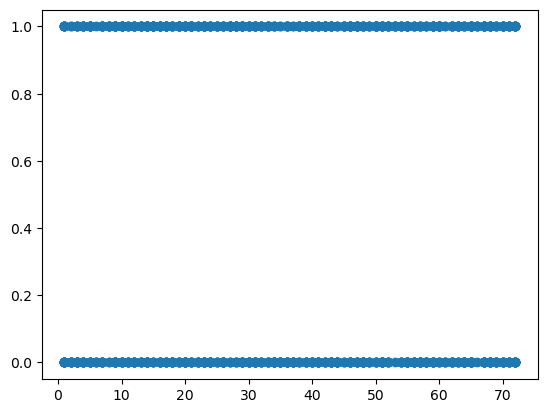

In [18]:
plt.scatter(x=df.Tenure, y=df.Churn)

c:\Users\anna.maria.gorska\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anna.maria.gorska\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


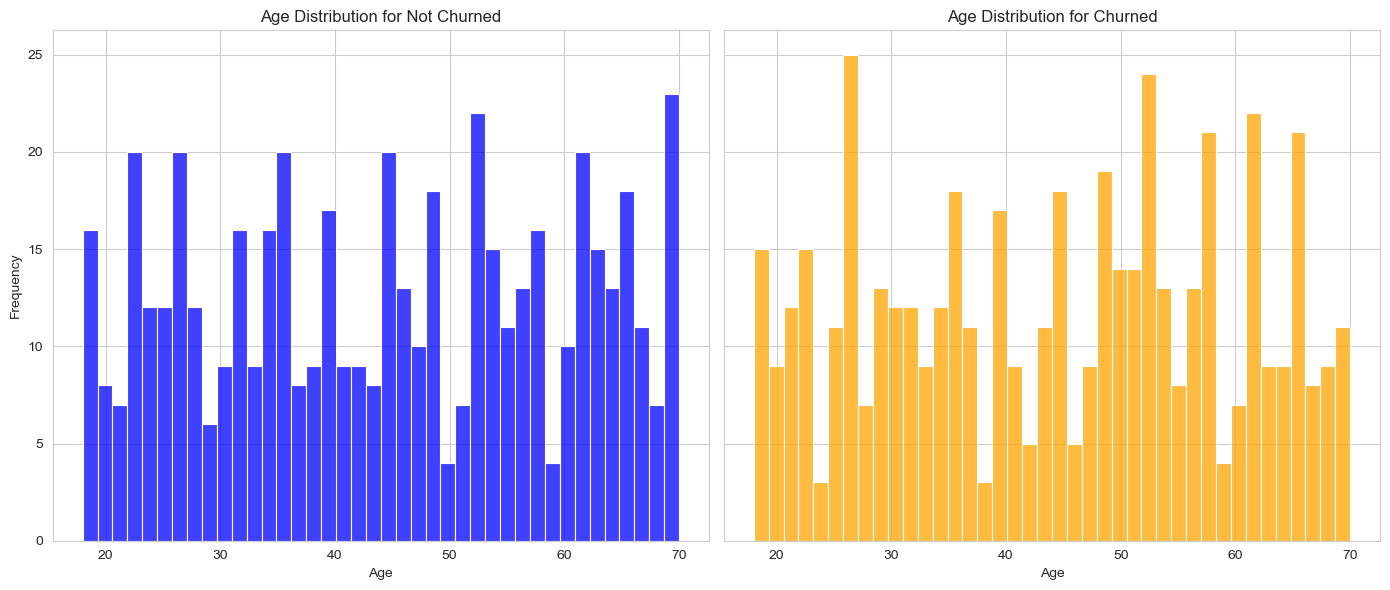

In [24]:
sns.set_style('whitegrid')

# Create separate histograms for churned and not churned customers using Seaborn
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(data=df[df['Churn'] == 0], x='Age', bins=40, color='blue', ax=ax1)
ax1.set_title('MonthlyCharges Distribution for Not Churned')
ax1.set_xlabel('TotalCharges')
ax1.set_ylabel('Frequency')

sns.histplot(data=df[df['Churn'] == 1], x='Age', bins=40, color='orange', ax=ax2)
ax2.set_title('Age Distribution for Churned')
ax2.set_xlabel('Age')

plt.tight_layout()

c:\Users\anna.maria.gorska\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\anna.maria.gorska\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


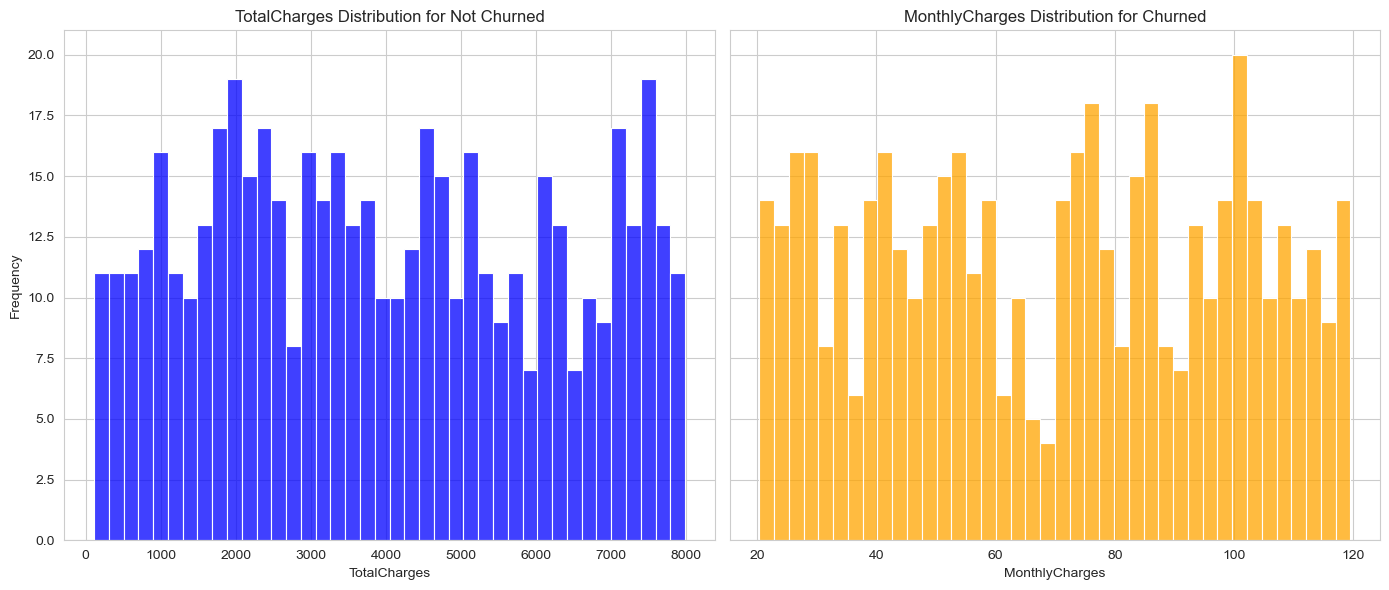

In [37]:
sns.set_style('whitegrid')

# Create separate histograms for churned and not churned customers using Seaborn
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.histplot(data=df[df['Churn'] == 0], x='TotalCharges', bins=40, color='blue', ax=ax1)
ax1.set_title('TotalCharges Distribution for Not Churned')
ax1.set_xlabel('TotalCharges')
ax1.set_ylabel('Frequency')

sns.histplot(data=df[df['Churn'] == 1], x='MonthlyCharges', bins=40, color='orange', ax=ax2)
ax2.set_title('MonthlyCharges Distribution for Churned')
ax2.set_xlabel('MonthlyCharges')

plt.tight_layout()

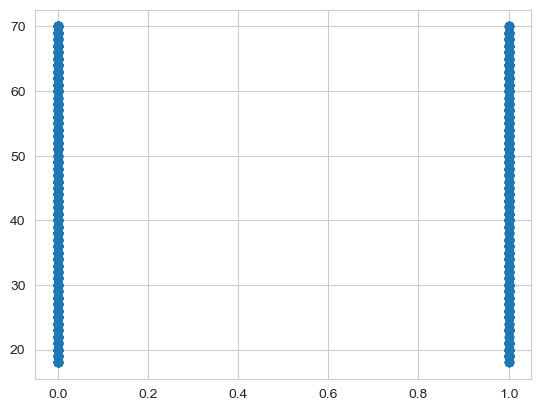

In [26]:
plt.scatter(y=df.Age, x=df.Churn)

Text(0.5, 1.0, 'Correlation Matrix')

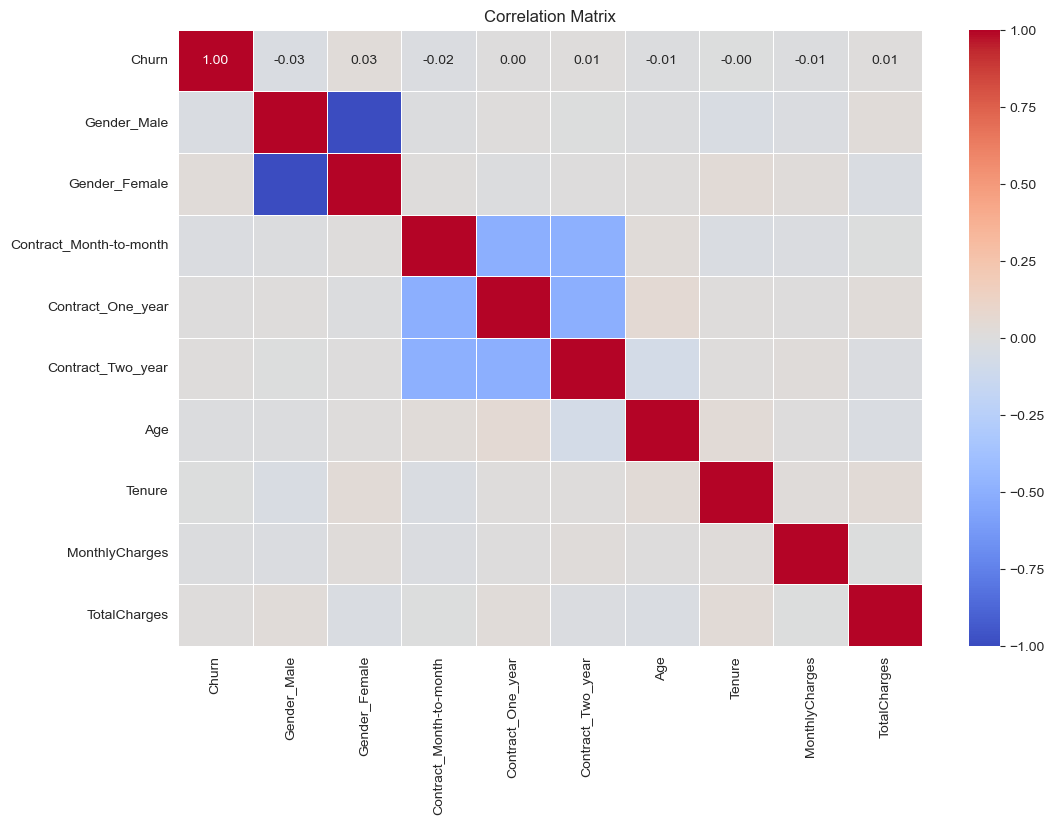

In [28]:
# Select columns for correlation matrix
columns = ['Churn', 'Gender_Male', 'Gender_Female', 'Contract_Month-to-month', 
           'Contract_One_year', 'Contract_Two_year', 'Age', 'Tenure', 
           'MonthlyCharges', 'TotalCharges']

# Compute the correlation matrix
correlation_matrix = df[columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')

In [30]:
df.corr(numeric_only=True)

,CustomerID,Age,Tenure,MonthlyCharges,TotalCharges,Churn,Gender_Male,Gender_Female,Contract_Month-to-month,Contract_One_year,Contract_Two_year
CustomerID,1.000000,-0.008477,0.042854,-0.070124,-0.034867,-0.012028,0.007041,-0.007041,-0.019832,-0.026546,0.046521
Age,-0.008477,1.000000,0.038315,0.000721,-0.024992,-0.010366,-0.013059,0.013059,0.027620,0.048156,-0.076042
Tenure,0.042854,0.038315,1.000000,0.019109,0.031735,-0.003566,-0.037422,0.037422,-0.023990,0.008604,0.015316
MonthlyCharges,-0.070124,0.000721,0.019109,1.000000,-0.003102,-0.013454,-0.017919,0.017919,-0.019481,0.002218,0.017236
TotalCharges,-0.034867,-0.024992,0.031735,-0.003102,1.000000,0.007935,0.026089,-0.026089,-0.006415,0.026793,-0.020542
Churn,-0.012028,-0.010366,-0.003566,-0.013454,0.007935,1.000000,-0.030643,0.030643,-0.015785,0.003833,0.011917
Gender_Male,0.007041,-0.013059,-0.037422,-0.017919,0.026089,-0.030643,1.000000,-1.000000,-0.008679,0.015079,-0.006496
Gender_Female,-0.007041,0.013059,0.037422,0.017919,-0.026089,0.030643,-1.000000,1.000000,0.008679,-0.015079,0.006496
Contract_Month-to-month,-0.019832,0.027620,-0.023990,-0.019481,-0.006415,-0.015785,-0.008679,0.008679,1.000000,-0.502596,-0.493652
Contract_One_year,-0.026546,0.048156,0.008604,0.002218,0.026793,0.003833,0.015079,-0.015079,-0.502596,1.000000,-0.503733


In [31]:
df.groupby('Churn').con

Contract_Month-to-month
False    0.67
True     0.33
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Non-Churned Customers by Contract Type (Churn = 0)')

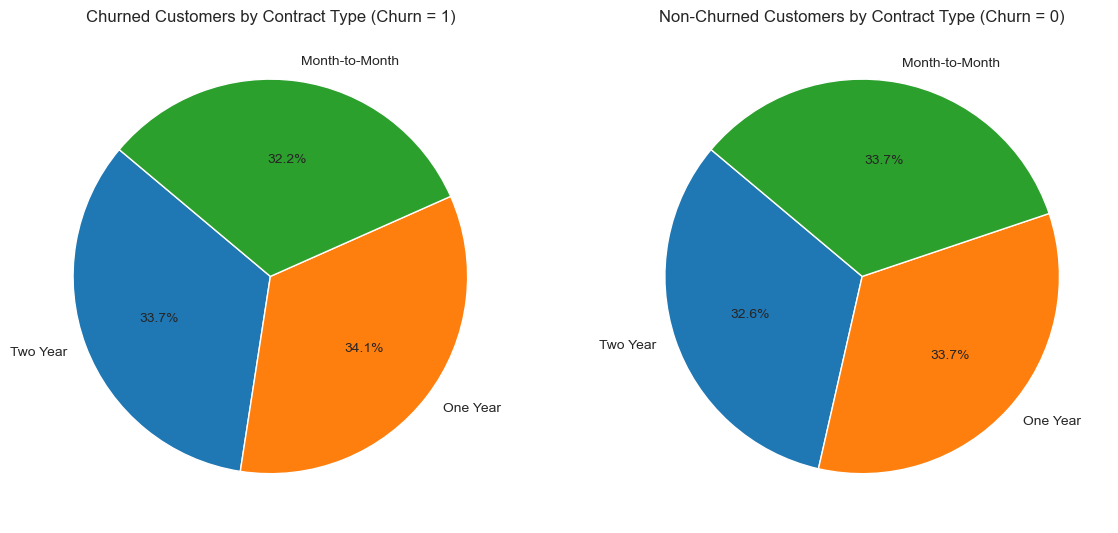

In [33]:
# Define label names for contract types
contract_labels = {
    (1, 0, 0): 'Month-to-Month',
    (0, 1, 0): 'One Year',
    (0, 0, 1): 'Two Year'
}

# Plot pie chart for churned customers by contract type
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
churned_data = df[df['Churn'] == 1].groupby(['Contract_Month-to-month', 'Contract_One_year', 'Contract_Two_year']).size()
churned_data.index = churned_data.index.map(contract_labels)
churned_data.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Churned Customers by Contract Type (Churn = 1)')

# Plot pie chart for non-churned customers by contract type
plt.subplot(1, 2, 2)
not_churned_data = df[df['Churn'] == 0].groupby(['Contract_Month-to-month', 'Contract_One_year', 'Contract_Two_year']).size()
not_churned_data.index = not_churned_data.index.map(contract_labels)
not_churned_data.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Non-Churned Customers by Contract Type (Churn = 0)')


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# for vizualizing the tree
import pydotplus
from IPython.display import Image 

In [39]:
# Create decision tree classifer object
tree_model = DecisionTreeClassifier(random_state=0,max_depth=5)
X = df[['Age', 'Tenure', 'MonthlyCharges']]
y = df.Churn
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [40]:
# logistic regression model fit
tree_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [41]:
# do prediction on test Data
y_pred=tree_model.predict(X_test)
print(y_pred)

# Calculate score
tree_model.score(X_test,y_test)

[0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0
 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 1 0 0 1 1 1 0 0 0]


0.59

In [43]:
tree_model = DecisionTreeClassifier(random_state=0,max_depth=5)
X = df[['Age', 'Tenure', 'Totalcharges']]
y = df.Churn
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

# logistic regression model fit
tree_model.fit(X_train,y_train)

# do prediction on test Data
y_pred=tree_model.predict(X_test)
print(y_pred)

# Calculate score
tree_model.score(X_test,y_test)

[1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1
 1 1 1 0 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1
 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1
 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0
 1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 0 1
 0 0 1 1 1 1 0 0 0 1 0 1 1 0 1]


0.46

In [46]:
tree_model = DecisionTreeClassifier(random_state=0,max_depth=5)
X = df[['Age', 'Tenure', 'MonthlyCharges', 'Contract_One_year']]
y = df.Churn
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

# logistic regression model fit
tree_model.fit(X_train,y_train)

# do prediction on test Data
y_pred=tree_model.predict(X_test)
print(y_pred)

# Calculate score
tree_model.score(X_test,y_test)

[0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0
 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0]


0.59

In [49]:
tree_model = DecisionTreeClassifier(random_state=0,max_depth=5)
X = df[['Age', 'Tenure', 'MonthlyCharges', 'Contract_One_year', 'Gender_Male']]
y = df.Churn
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

# logistic regression model fit
tree_model.fit(X_train,y_train)

# do prediction on test Data
y_pred=tree_model.predict(X_test)
print(y_pred)

# Calculate score
tree_model.score(X_test,y_test)

[0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0
 1 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 0
 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0]


0.59